<a href="https://colab.research.google.com/github/khushisachdev/python-projects/blob/master/default_credit_card_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

df = pd.read_csv("hf://datasets/scikit-learn/credit-card-clients/UCI_Credit_Card.csv")

In [18]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [19]:
print(df.isnull().sum())  # Count missing values


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [20]:
df.fillna(df.median(), inplace=True)


In [21]:
df.drop(columns=['ID'], inplace=True)


In [22]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
df['SEX'] = df['SEX'].map({1: 0, 2: 1})  # Male: 0, Female: 1
df['MARRIAGE'] = df['MARRIAGE'].map({1: 0, 2: 1, 3: 2})  # Married: 0, Single: 1, Others: 2
df['EDUCATION'] = df['EDUCATION'].map({1: 0, 2: 1, 3: 2, 4: 3})  # Simplified encoding


In [23]:
from sklearn.preprocessing import StandardScaler

# List of columns to scale
cols_to_scale = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [24]:
X = df.drop(columns=['default.payment.next.month'])  # Features
y = df['default.payment.next.month']  # Target variable


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [27]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("📌 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


📌 Random Forest Results:
Accuracy: 0.8138333333333333
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



In [34]:
# Initialize and train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
print("📌 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:42:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 XGBoost Results:
Accuracy: 0.8106666666666666
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.62      0.37      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [32]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
rf_params = {
    'n_estimators': [100, 200],  # Test only a few values
    'max_depth': [10, 20],  # Limiting depth
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]  # Fixing bootstrap to True for simplicity
}

# Randomized Search
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=10,  # Fewer iterations
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
# Train
rf_random.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Random Forest:", rf_random.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


In [31]:
!pip install --upgrade xgboost scikit-learn


In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DMatrix (XGBoost specific data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters for grid search
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 6
}

# Perform grid search using xgboost's built-in cv method
gridsearch_results = xgb.cv(params=params,
                            dtrain=dtrain,
                            num_boost_round=500,
                            nfold=3,
                            early_stopping_rounds=10,
                            verbose_eval=True)

# Best iteration and score
print("Best Boosting Round:", gridsearch_results.shape[0])
print("Best Log Loss:", gridsearch_results['test-logloss-mean'].min())

best_iteration = gridsearch_results['test-logloss-mean'].idxmin()

# Extract the best logloss score
best_log_loss = gridsearch_results['test-logloss-mean'].min()

# Print the best iteration and log loss
print("Best Boosting Round:", best_iteration)
print("Best Log Loss:", best_log_loss)

# Now use the best iteration to train the final model
params['n_estimators'] = best_iteration  # Use best iteration (boosting rounds)
final_model = xgb.XGBClassifier(**params, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Optionally, evaluate the model performance (accuracy, etc.)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


[0]	train-logloss:0.51023+0.00224	test-logloss:0.51189+0.00371
[1]	train-logloss:0.49414+0.00237	test-logloss:0.49731+0.00376
[2]	train-logloss:0.48109+0.00258	test-logloss:0.48579+0.00397
[3]	train-logloss:0.47014+0.00273	test-logloss:0.47664+0.00417
[4]	train-logloss:0.46083+0.00276	test-logloss:0.46919+0.00441
[5]	train-logloss:0.45285+0.00274	test-logloss:0.46301+0.00459
[6]	train-logloss:0.44606+0.00277	test-logloss:0.45797+0.00487
[7]	train-logloss:0.44001+0.00278	test-logloss:0.45352+0.00495
[8]	train-logloss:0.43492+0.00281	test-logloss:0.44991+0.00495
[9]	train-logloss:0.43027+0.00274	test-logloss:0.44680+0.00495
[10]	train-logloss:0.42612+0.00283	test-logloss:0.44419+0.00507
[11]	train-logloss:0.42262+0.00279	test-logloss:0.44206+0.00522
[12]	train-logloss:0.41936+0.00295	test-logloss:0.44025+0.00521
[13]	train-logloss:0.41642+0.00287	test-logloss:0.43893+0.00522
[14]	train-logloss:0.41348+0.00276	test-logloss:0.43745+0.00539
[15]	train-logloss:0.41108+0.00281	test-logloss:0.

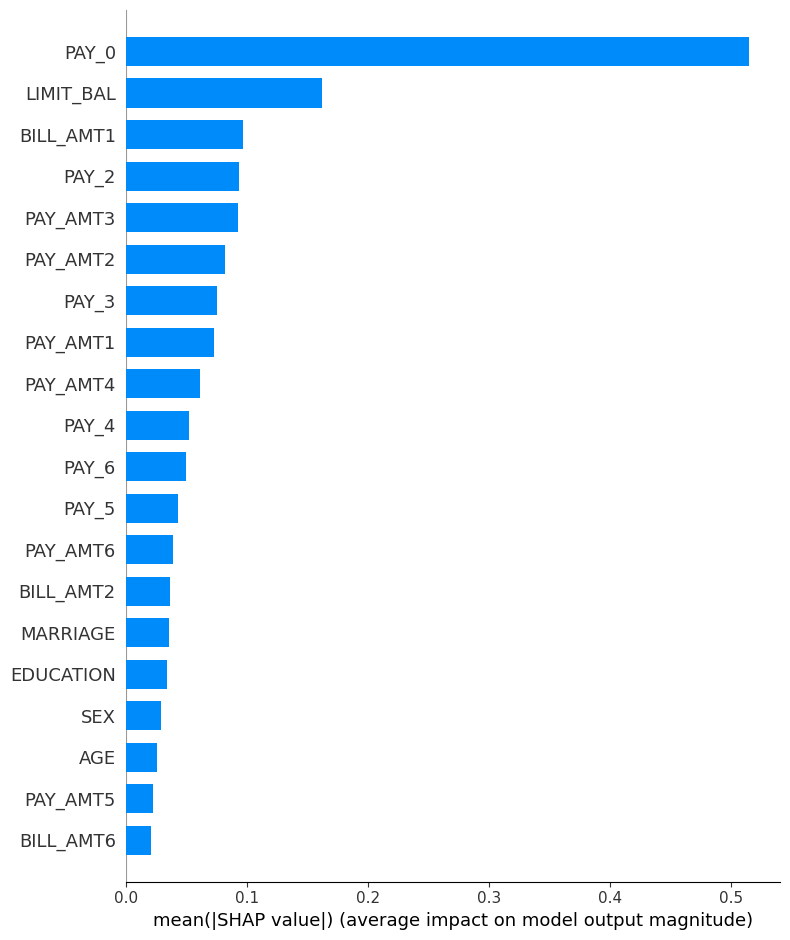

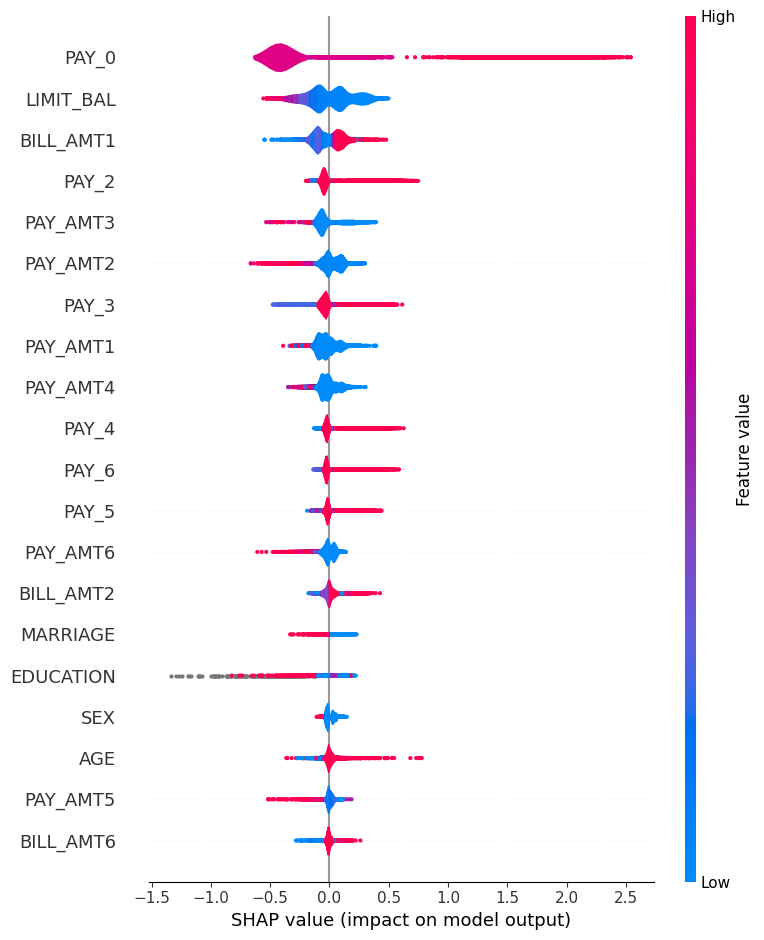

In [42]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer for the trained model
explainer = shap.TreeExplainer(final_model)

# Calculate SHAP values for the training set
shap_values = explainer.shap_values(X_train)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Optionally, you can also use a violin plot for a more detailed visualization
shap.summary_plot(shap_values, X_train, plot_type="violin")
